In [1]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 23.6MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
path = "drive/MyDrive/Mask/"

In [ ]:
x = []
y = []
size = (160,160)

In [ ]:
for i in range(15):
  img = cv2.imread(path + "beard/beard.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("beard")
  img = cv2.imread(path + "mask/mask.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("mask")
  img = cv2.imread(path + "partial mask/partial_mask.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("partial mask")
  img = cv2.imread(path + "no mask/no_mask.{}.png".format(i))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  x.append(img)
  y.append("no mask")

In [ ]:
x1 = []
detector = MTCNN()

In [ ]:
temp = 0
for i in x:
    img = i
    result = detector.detect_faces(img)
    if(result == []):
        temp +=1
        print(temp)
        continue
    X1, Y1 = result[0]["box"][0] , result[0]["box"][1]
    X2, Y2 = abs(X1) + abs(result[0]["box"][2]), abs(Y1) + abs(result[0]["box"][3])
    img = img[Y1:Y2, X1:X2]
    x1.append(img)

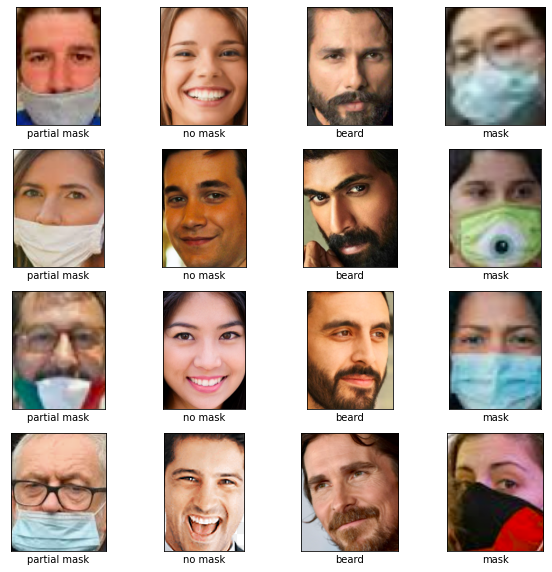

In [ ]:
fig = plt.figure(figsize=(10, 10))
j = 10
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    ax.imshow(x1[i+j])
    ax.set_xlabel(y[i+j])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
x2 = []
temp = 0
for i in x:
    img = i
    result = detector.detect_faces(img)
    if(result == []):
        temp +=1
        print(temp)
        continue
    X1, Y1 = result[0]["box"][0] , result[0]["box"][1]
    X2, Y2 = abs(X1) + abs(result[0]["box"][2]), abs(Y1) + abs(result[0]["box"][3])
    Y3 = (Y1 + Y2)//2
    img = img[Y3:Y2, X1:X2]
    img = cv2.resize(img, size)
    x2.append(img)

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi=1000)
j = 10
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    ax.imshow(x2[i+j])
    ax.set_xlabel(y[i+j])
    ax.set_xticks([])
    ax.set_yticks([])
#plt.savefig("Desktop/Mask/Generated Files/mask/plots/transform_2.png")

In [ ]:
print(len(x2))
print(len(y))


60
60


In [ ]:
from keras.utils import np_utils

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
encoder = LabelEncoder()

In [ ]:
y_ = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(y_, len(np.unique(y_)))

In [ ]:
y_onehot[0:10]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2,y_onehot, stratify = y)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
vgg16 =  VGG16(input_shape=(160,160,3), weights='imagenet', include_top=False)

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)
prediction = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 131ms/step - loss: 9.0897 - accuracy: 0.2889 - val_loss: 4.7200 - val_accuracy: 0.6000
Epoch 2/5
2/2 [==============================] - 0s 43ms/step - loss: 1.0827 - accuracy: 0.8889 - val_loss: 2.8458 - val_accuracy: 0.8000
Epoch 3/5
2/2 [==============================] - 0s 42ms/step - loss: 0.0943 - accuracy: 0.9778 - val_loss: 1.0761 - val_accuracy: 0.8667
Epoch 4/5
2/2 [==============================] - 0s 41ms/step - loss: 1.5895e-08 - accuracy: 1.0000 - val_loss: 0.4011 - val_accuracy: 0.9333
Epoch 5/5
2/2 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9333


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


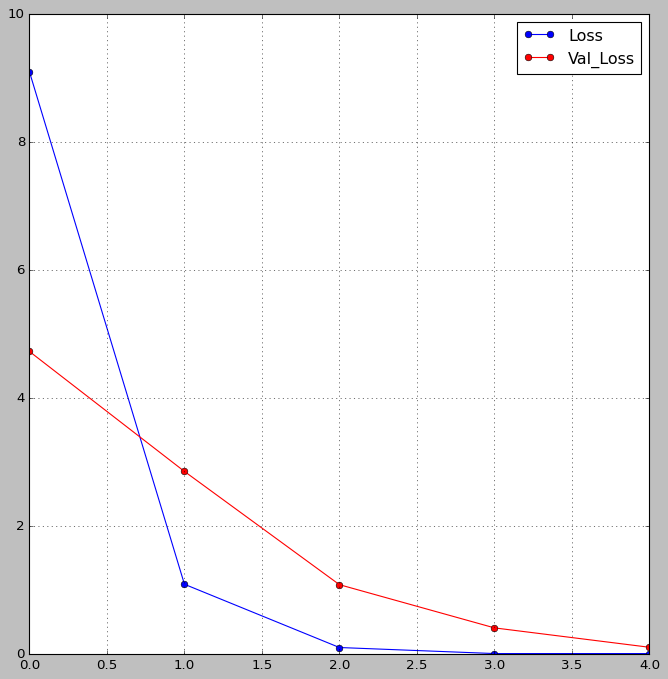

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(range(0,5)),history.history["loss"], marker = "o", label = "Loss", color = "blue")
plt.plot(list(range(0,5)),history.history["val_loss"], marker = "o", label = "Val_Loss", color = "red")
plt.grid(True)
plt.legend()

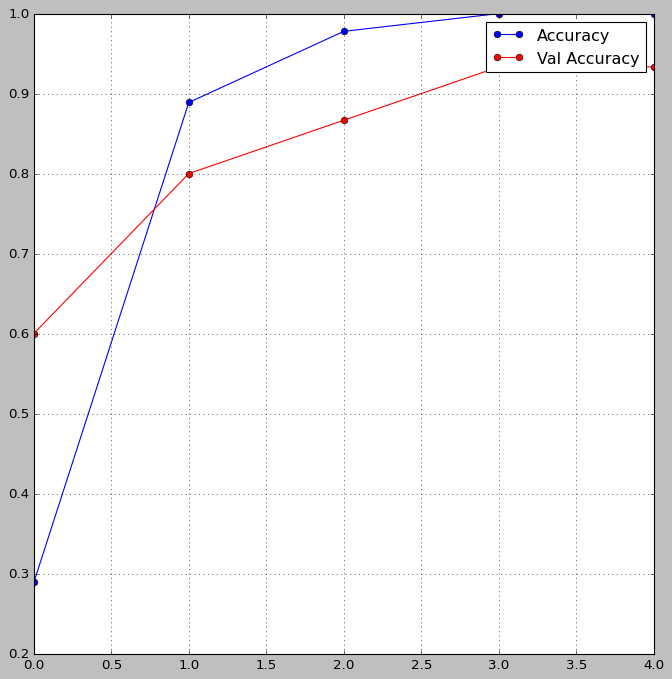

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(range(0,5)),history.history["accuracy"], marker = "o", color = "blue", label = "Accuracy")
plt.plot(list(range(0,5)),history.history["val_accuracy"], marker = "o", color = "red", label = "Val Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
import pickle

In [ ]:
model.save("drive/MyDrive/Mask/Mask Model.model")

INFO:tensorflow:Assets written to: drive/MyDrive/Mask/Mask Model.model/assets


In [ ]:
from keras.models import load_model

In [ ]:
mo = load_model("Mask Model.model")

In [ ]:
result = mo.predict(x_test)

In [ ]:
result[0]

array([0.0000000e+00, 7.2380695e-23, 0.0000000e+00, 1.0000000e+00],
      dtype=float32)

In [ ]:
for i in result:
  print(encoder.inverse_transform([np.argmax(i)]))

['partial mask']
['beard']
['mask']
['no mask']
['beard']
['no mask']
['partial mask']
['mask']
['mask']
['partial mask']
['beard']
['beard']
['no mask']
['mask']
['no mask']


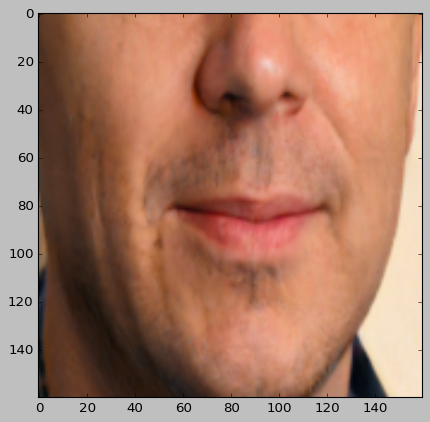

In [ ]:
plt.imshow(x_test[3])

In [ ]:
import pandas as pd

In [ ]:
vgg16_history = pd.DataFrame({
              "Loss":history.history["loss"],
              "Val Loss":history.history["val_loss"],
              "Accuracy":history.history["accuracy"],
              "Val Accuracy":history.history["val_accuracy"],
})

In [ ]:
vgg16_history.to_csv("drive/MyDrive/Mask/vgg16_history.csv")